<a href="https://colab.research.google.com/github/naveen2139/Chennai-House-Price-Prediction/blob/main/Chennai_House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**

Real estate transactions are quite opaque sometimes and it may be difficult for a newbie to know the fair price of any given home. Thus, multiple real estate websites have the functionality to predict the prices of houses given different features regarding it. Such forecasting models will help buyers to identify a fair price for the home and also give insights to sellers as to how to build homes that fetch them more money. Chennai house sale price data is shared here and the participants are expected to build a sale price prediction model that will aid the customers to find a fair price for their homes and also help the sellers understand what factors are fetching more money for the houses?


# ***Importing Libraries***

In [1]:
#importing all the required packages
import pandas as pd
import numpy as np
from google.colab import files
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [2]:
#upload the dataset
# files.upload()

In [3]:
#Converting the dataset into Dataframe
df=pd.read_csv('/content/train-chennai-sale.csv')
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


# ***Data Cleaning***

In [4]:
#prints information about a DataFrame including the index dtype and columns, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

##**Handling null Values**

In [5]:
#Prints the numner of null values in each column
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [6]:
# Droping row where no of bedrooms is NA
df=df.dropna(subset=['N_BEDROOM'])

In [7]:
#Prints the numner of null values in each column
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [8]:
# The describe() method is used for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.
# It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.
df['N_BATHROOM'].describe()

count    7103.00000
mean        1.21329
std         0.40966
min         1.00000
25%         1.00000
50%         1.00000
75%         1.00000
max         2.00000
Name: N_BATHROOM, dtype: float64

In [9]:
#fills all the null values with the mode of non-null values in a column
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].mode()[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
df.N_BATHROOM.isna().sum()

0

In [11]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [12]:
df['QS_OVERALL'].describe()

count    7060.000000
mean        3.503303
std         0.527244
min         2.000000
25%         3.130000
50%         3.500000
75%         3.890000
max         4.970000
Name: QS_OVERALL, dtype: float64

In [13]:
#fills all the null values with the mean of non-null values in a column
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())
df.isna().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [14]:
#Removing specific column from dataset
df=df.drop(['PRT_ID'],axis=1)
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

In [15]:
df.AREA.describe()

count         7108
unique          17
top       Chrompet
freq          1681
Name: AREA, dtype: object

##**Correcting the spelling mistakes in all columns**

In [16]:
#prints all unique values in column in a sorted manner
sorted(df.AREA.unique())

['Adyar',
 'Adyr',
 'Ana Nagar',
 'Ann Nagar',
 'Anna Nagar',
 'Chormpet',
 'Chrmpet',
 'Chrompet',
 'Chrompt',
 'KK Nagar',
 'KKNagar',
 'Karapakam',
 'Karapakkam',
 'T Nagar',
 'TNagar',
 'Velachery',
 'Velchery']

In [17]:
#Replace values 
df['AREA']=df['AREA'].replace(['Adyr'],'Adyar')
df['AREA']=df['AREA'].replace(['Ana Nagar','Ann Nagar'],'Anna Nagar')
df['AREA']=df['AREA'].replace(['Chormpet','Chrmpet','Chrompet','Chrompt',],'chromepet')
df['AREA']=df['AREA'].replace(['KKNagar'],'KK Nagar')
df['AREA']=df['AREA'].replace(['Karapakam'],'Karapakkam')
df['AREA']=df['AREA'].replace(['TNagar'],'T Nagar')
df['AREA']=df['AREA'].replace(['Velchery'],'Velachery')
sorted(df.AREA.unique())

['Adyar',
 'Anna Nagar',
 'KK Nagar',
 'Karapakkam',
 'T Nagar',
 'Velachery',
 'chromepet']

In [18]:
df['AREA']=df['AREA'].str.lower()
sorted(df.AREA.unique())

['adyar',
 'anna nagar',
 'chromepet',
 'karapakkam',
 'kk nagar',
 't nagar',
 'velachery']

In [19]:
#Converting date sale to year
df['DATE_SALE']=pd.DatetimeIndex(df['DATE_SALE']).year
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,karapakkam,1004,2011,131,1.0,1.0,3,AbNormal,Yes,15-05-1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,anna nagar,1986,2006,26,2.0,1.0,5,AbNormal,No,22-12-1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,adyar,909,2012,70,1.0,1.0,3,AbNormal,Yes,09-02-1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,velachery,1855,2010,14,3.0,2.0,5,Family,No,18-03-1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,karapakkam,1226,2009,84,1.0,1.0,3,AbNormal,Yes,13-10-1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [20]:
df['INT_SQFT'].describe()

count    7108.000000
mean     1382.048537
std       457.438429
min       500.000000
25%       993.000000
50%      1373.000000
75%      1744.000000
max      2500.000000
Name: INT_SQFT, dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7108 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7108 non-null   object 
 1   INT_SQFT       7108 non-null   int64  
 2   DATE_SALE      7108 non-null   int64  
 3   DIST_MAINROAD  7108 non-null   int64  
 4   N_BEDROOM      7108 non-null   float64
 5   N_BATHROOM     7108 non-null   float64
 6   N_ROOM         7108 non-null   int64  
 7   SALE_COND      7108 non-null   object 
 8   PARK_FACIL     7108 non-null   object 
 9   DATE_BUILD     7108 non-null   object 
 10  BUILDTYPE      7108 non-null   object 
 11  UTILITY_AVAIL  7108 non-null   object 
 12  STREET         7108 non-null   object 
 13  MZZONE         7108 non-null   object 
 14  QS_ROOMS       7108 non-null   float64
 15  QS_BATHROOM    7108 non-null   float64
 16  QS_BEDROOM     7108 non-null   float64
 17  QS_OVERALL     7108 non-null   float64
 18  REG_FEE 

***Converting to int datatype***

In [22]:
df.N_BEDROOM=df.N_BEDROOM.astype('int')
df.N_BATHROOM=df.N_BATHROOM.astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7108 entries, 0 to 7108
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7108 non-null   object 
 1   INT_SQFT       7108 non-null   int64  
 2   DATE_SALE      7108 non-null   int64  
 3   DIST_MAINROAD  7108 non-null   int64  
 4   N_BEDROOM      7108 non-null   int64  
 5   N_BATHROOM     7108 non-null   int64  
 6   N_ROOM         7108 non-null   int64  
 7   SALE_COND      7108 non-null   object 
 8   PARK_FACIL     7108 non-null   object 
 9   DATE_BUILD     7108 non-null   object 
 10  BUILDTYPE      7108 non-null   object 
 11  UTILITY_AVAIL  7108 non-null   object 
 12  STREET         7108 non-null   object 
 13  MZZONE         7108 non-null   object 
 14  QS_ROOMS       7108 non-null   float64
 15  QS_BATHROOM    7108 non-null   float64
 16  QS_BEDROOM     7108 non-null   float64
 17  QS_OVERALL     7108 non-null   float64
 18  REG_FEE 

In [23]:
sorted(df.SALE_COND.unique())

['Ab Normal',
 'AbNormal',
 'Adj Land',
 'AdjLand',
 'Family',
 'Normal Sale',
 'PartiaLl',
 'Partial',
 'Partiall']

In [24]:
df['SALE_COND']=df['SALE_COND'].replace(['Ab Normal'],'AbNormal')
df['SALE_COND']=df['SALE_COND'].replace(['Adj Land'],'AdjLand')
df['SALE_COND']=df['SALE_COND'].replace(['PartiaLl','Partiall'],'Partial')
sorted(df.SALE_COND.unique())

['AbNormal', 'AdjLand', 'Family', 'Normal Sale', 'Partial']

In [25]:
df['SALE_COND']=df['SALE_COND'].str.lower()
sorted(df.SALE_COND.unique())

['abnormal', 'adjland', 'family', 'normal sale', 'partial']

In [26]:
sorted(df.PARK_FACIL.unique())

['No', 'Noo', 'Yes']

In [27]:
df['PARK_FACIL']=df['PARK_FACIL'].replace(['Noo'],'No')
sorted(df.PARK_FACIL.unique())

['No', 'Yes']

In [28]:
df['PARK_FACIL']=df['PARK_FACIL'].str.lower()
sorted(df.PARK_FACIL.unique())

['no', 'yes']

In [29]:
df['DATE_BUILD']=pd.DatetimeIndex(df['DATE_BUILD']).year
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,karapakkam,1004,2011,131,1,1,3,abnormal,yes,1967,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,anna nagar,1986,2006,26,2,1,5,abnormal,no,1995,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,adyar,909,2012,70,1,1,3,abnormal,yes,1992,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,velachery,1855,2010,14,3,2,5,family,no,1988,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,karapakkam,1226,2009,84,1,1,3,abnormal,yes,1979,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [30]:
sorted(df.BUILDTYPE.unique())

['Comercial', 'Commercial', 'House', 'Other', 'Others']

In [31]:
df['BUILDTYPE']=df['BUILDTYPE'].replace(['Comercial'],'Commercial')
df['BUILDTYPE']=df['BUILDTYPE'].replace(['Other'],'Others')
sorted(df.BUILDTYPE.unique())

['Commercial', 'House', 'Others']

In [32]:
df['BUILDTYPE']=df['BUILDTYPE'].str.lower()
sorted(df.BUILDTYPE.unique())

['commercial', 'house', 'others']

In [33]:
sorted(df.UTILITY_AVAIL.unique())

['All Pub', 'AllPub', 'ELO', 'NoSeWa', 'NoSewr ']

In [34]:
# Trimming the spaces
df.UTILITY_AVAIL=df.UTILITY_AVAIL.str.strip()
sorted(df.UTILITY_AVAIL.unique())

['All Pub', 'AllPub', 'ELO', 'NoSeWa', 'NoSewr']

In [35]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace(['All Pub'],'AllPub')
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace(['NoSewr'],'NoSeWa')
sorted(df.UTILITY_AVAIL.unique())

['AllPub', 'ELO', 'NoSeWa']

In [36]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].str.lower()
sorted(df.UTILITY_AVAIL.unique())

['allpub', 'elo', 'nosewa']

In [37]:
sorted(df.STREET.unique())

['Gravel', 'No Access', 'NoAccess', 'Pavd', 'Paved']

In [38]:
df['STREET']=df['STREET'].replace(['No Access'],'NoAccess')
df['STREET']=df['STREET'].replace(['Pavd'],'Paved')
sorted(df.STREET.unique())

['Gravel', 'NoAccess', 'Paved']

In [39]:
df['STREET']=df['STREET'].str.lower()
sorted(df.STREET.unique())

['gravel', 'noaccess', 'paved']

In [40]:
sorted(df.MZZONE.unique())

['A', 'C', 'I', 'RH', 'RL', 'RM']

In [41]:
df['MZZONE']=df['MZZONE'].str.lower()
sorted(df.MZZONE.unique())

['a', 'c', 'i', 'rh', 'rl', 'rm']

In [42]:
df=df.drop(['REG_FEE','COMMIS'],axis=1)
df.columns

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE'],
      dtype='object')

In [43]:
df['BUILDING AGE']=df.DATE_SALE-df.DATE_BUILD

In [44]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,karapakkam,1004,2011,131,1,1,3,abnormal,yes,1967,commercial,allpub,paved,a,4.0,3.9,4.9,4.330,7600000,44
1,anna nagar,1986,2006,26,2,1,5,abnormal,no,1995,commercial,allpub,gravel,rh,4.9,4.2,2.5,3.765,21717770,11
2,adyar,909,2012,70,1,1,3,abnormal,yes,1992,commercial,elo,gravel,rl,4.1,3.8,2.2,3.090,13159200,20
3,velachery,1855,2010,14,3,2,5,family,no,1988,others,nosewa,paved,i,4.7,3.9,3.6,4.010,9630290,22
4,karapakkam,1226,2009,84,1,1,3,abnormal,yes,1979,others,allpub,gravel,c,3.0,2.5,4.1,3.290,7406250,30


In [45]:
#finding average sales price grouping by Area
x=df.groupby(['AREA']).mean().SALES_PRICE
x

AREA
adyar         9.185668e+06
anna nagar    1.517376e+07
chromepet     1.001381e+07
karapakkam    7.340100e+06
kk nagar      1.269623e+07
t nagar       1.561674e+07
velachery     1.104735e+07
Name: SALES_PRICE, dtype: float64

In [46]:
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,karapakkam,1004,2011,131,1,1,3,abnormal,yes,1967,commercial,allpub,paved,a,4.0,3.9,4.9,4.330,7600000,44
1,anna nagar,1986,2006,26,2,1,5,abnormal,no,1995,commercial,allpub,gravel,rh,4.9,4.2,2.5,3.765,21717770,11
2,adyar,909,2012,70,1,1,3,abnormal,yes,1992,commercial,elo,gravel,rl,4.1,3.8,2.2,3.090,13159200,20
3,velachery,1855,2010,14,3,2,5,family,no,1988,others,nosewa,paved,i,4.7,3.9,3.6,4.010,9630290,22
4,karapakkam,1226,2009,84,1,1,3,abnormal,yes,1979,others,allpub,gravel,c,3.0,2.5,4.1,3.290,7406250,30


In [47]:
#Sorting the average sales by area
y=sorted(x.items(), key =lambda kv:(kv[1], kv[0]))
y


[('karapakkam', 7340100.109809663),
 ('adyar', 9185668.391472869),
 ('chromepet', 10013809.64747356),
 ('velachery', 11047353.027522936),
 ('kk nagar', 12696228.746238716),
 ('anna nagar', 15173755.158831004),
 ('t nagar', 15616742.59481038)]

In [48]:
#Encoding the values based on average sales price
df['AREA']=df['AREA'].replace({"karapakkam":1,"adyar":2,"chromepet":3,"velachery":4,"kk nagar":5,"anna nagar":6,"t nagar":7})
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,1,1004,2011,131,1,1,3,abnormal,yes,1967,commercial,allpub,paved,a,4.0,3.9,4.9,4.330,7600000,44
1,6,1986,2006,26,2,1,5,abnormal,no,1995,commercial,allpub,gravel,rh,4.9,4.2,2.5,3.765,21717770,11
2,2,909,2012,70,1,1,3,abnormal,yes,1992,commercial,elo,gravel,rl,4.1,3.8,2.2,3.090,13159200,20
3,4,1855,2010,14,3,2,5,family,no,1988,others,nosewa,paved,i,4.7,3.9,3.6,4.010,9630290,22
4,1,1226,2009,84,1,1,3,abnormal,yes,1979,others,allpub,gravel,c,3.0,2.5,4.1,3.290,7406250,30


In [49]:
df.AREA.unique()

array([1, 6, 2, 4, 3, 5, 7])

In [50]:
x=df.groupby(['SALE_COND']).mean().SALES_PRICE
y=sorted(x.items(), key =lambda kv:(kv[1], kv[0]))
y

[('partial', 10616242.660614526),
 ('family', 10736415.498930862),
 ('abnormal', 10914631.562721474),
 ('normal sale', 10994177.803935347),
 ('adjland', 11209314.975677554)]

In [51]:
df['SALE_COND']=df['SALE_COND'].replace({"partial":1,"family":2,"abnormal":3,"normal sale":4,"adjland":5})
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,1,1004,2011,131,1,1,3,3,yes,1967,commercial,allpub,paved,a,4.0,3.9,4.9,4.330,7600000,44
1,6,1986,2006,26,2,1,5,3,no,1995,commercial,allpub,gravel,rh,4.9,4.2,2.5,3.765,21717770,11
2,2,909,2012,70,1,1,3,3,yes,1992,commercial,elo,gravel,rl,4.1,3.8,2.2,3.090,13159200,20
3,4,1855,2010,14,3,2,5,2,no,1988,others,nosewa,paved,i,4.7,3.9,3.6,4.010,9630290,22
4,1,1226,2009,84,1,1,3,3,yes,1979,others,allpub,gravel,c,3.0,2.5,4.1,3.290,7406250,30


In [52]:
df.SALE_COND.unique()

array([3, 2, 1, 5, 4])

In [53]:
x=df.groupby(['PARK_FACIL']).mean().SALES_PRICE
y=sorted(x.items(), key =lambda kv:(kv[1], kv[0]))
y

[('no', 10337919.779892076), ('yes', 11441678.084750488)]

In [54]:
df['PARK_FACIL']=df['PARK_FACIL'].replace({"no":1,"yes":2})
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,1,1004,2011,131,1,1,3,3,2,1967,commercial,allpub,paved,a,4.0,3.9,4.9,4.330,7600000,44
1,6,1986,2006,26,2,1,5,3,1,1995,commercial,allpub,gravel,rh,4.9,4.2,2.5,3.765,21717770,11
2,2,909,2012,70,1,1,3,3,2,1992,commercial,elo,gravel,rl,4.1,3.8,2.2,3.090,13159200,20
3,4,1855,2010,14,3,2,5,2,1,1988,others,nosewa,paved,i,4.7,3.9,3.6,4.010,9630290,22
4,1,1226,2009,84,1,1,3,3,2,1979,others,allpub,gravel,c,3.0,2.5,4.1,3.290,7406250,30


In [55]:
df.PARK_FACIL.unique()

array([2, 1])

In [56]:
x=df.groupby(['BUILDTYPE']).mean().SALES_PRICE
y=sorted(x.items(), key =lambda kv:(kv[1], kv[0]))
y

[('house', 9098151.14817847),
 ('others', 9807998.01583904),
 ('commercial', 13869836.073422069)]

In [57]:
df['BUILDTYPE']=df['BUILDTYPE'].replace({"house":1,"others":2,"commercial":3})
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,1,1004,2011,131,1,1,3,3,2,1967,3,allpub,paved,a,4.0,3.9,4.9,4.330,7600000,44
1,6,1986,2006,26,2,1,5,3,1,1995,3,allpub,gravel,rh,4.9,4.2,2.5,3.765,21717770,11
2,2,909,2012,70,1,1,3,3,2,1992,3,elo,gravel,rl,4.1,3.8,2.2,3.090,13159200,20
3,4,1855,2010,14,3,2,5,2,1,1988,2,nosewa,paved,i,4.7,3.9,3.6,4.010,9630290,22
4,1,1226,2009,84,1,1,3,3,2,1979,2,allpub,gravel,c,3.0,2.5,4.1,3.290,7406250,30


In [58]:
df.BUILDTYPE.unique()

array([3, 2, 1])

In [59]:
x=df.groupby(['UTILITY_AVAIL']).mean().SALES_PRICE
y=sorted(x.items(), key =lambda kv:(kv[1], kv[0]))
y

[('elo', 10469414.625492772),
 ('nosewa', 10909263.675317653),
 ('allpub', 11210015.601483837)]

In [60]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace({"elo":1,"nosewa":2,"allpub":3})
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,1,1004,2011,131,1,1,3,3,2,1967,3,3,paved,a,4.0,3.9,4.9,4.330,7600000,44
1,6,1986,2006,26,2,1,5,3,1,1995,3,3,gravel,rh,4.9,4.2,2.5,3.765,21717770,11
2,2,909,2012,70,1,1,3,3,2,1992,3,1,gravel,rl,4.1,3.8,2.2,3.090,13159200,20
3,4,1855,2010,14,3,2,5,2,1,1988,2,2,paved,i,4.7,3.9,3.6,4.010,9630290,22
4,1,1226,2009,84,1,1,3,3,2,1979,2,3,gravel,c,3.0,2.5,4.1,3.290,7406250,30


In [61]:
df.UTILITY_AVAIL.unique()

array([3, 1, 2])

In [62]:
x=df.groupby(['STREET']).mean().SALES_PRICE
y=sorted(x.items(), key =lambda kv:(kv[1], kv[0]))
y

[('noaccess', 10000343.067956349),
 ('paved', 11057536.708786936),
 ('gravel', 11444618.569444444)]

In [63]:
df['STREET']=df['STREET'].replace({"noaccess":1,"paved":2,"gravel":3})
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,1,1004,2011,131,1,1,3,3,2,1967,3,3,2,a,4.0,3.9,4.9,4.330,7600000,44
1,6,1986,2006,26,2,1,5,3,1,1995,3,3,3,rh,4.9,4.2,2.5,3.765,21717770,11
2,2,909,2012,70,1,1,3,3,2,1992,3,1,3,rl,4.1,3.8,2.2,3.090,13159200,20
3,4,1855,2010,14,3,2,5,2,1,1988,2,2,2,i,4.7,3.9,3.6,4.010,9630290,22
4,1,1226,2009,84,1,1,3,3,2,1979,2,3,3,c,3.0,2.5,4.1,3.290,7406250,30


In [64]:
df.STREET.unique()

array([2, 3, 1])

In [65]:
x=df.groupby(['MZZONE']).mean().SALES_PRICE
y=sorted(x.items(), key =lambda kv:(kv[1], kv[0]))
y

[('a', 7292591.080074488),
 ('c', 8052270.172727273),
 ('i', 8738632.723809524),
 ('rh', 11039971.550493963),
 ('rl', 11765762.54305705),
 ('rm', 12407955.77092511)]

In [66]:
df['MZZONE']=df['MZZONE'].replace({"a":1,"c":2,"i":3,"rh":4,"rl":5,"rm":6})
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
0,1,1004,2011,131,1,1,3,3,2,1967,3,3,2,1,4.0,3.9,4.9,4.330,7600000,44
1,6,1986,2006,26,2,1,5,3,1,1995,3,3,3,4,4.9,4.2,2.5,3.765,21717770,11
2,2,909,2012,70,1,1,3,3,2,1992,3,1,3,5,4.1,3.8,2.2,3.090,13159200,20
3,4,1855,2010,14,3,2,5,2,1,1988,2,2,2,3,4.7,3.9,3.6,4.010,9630290,22
4,1,1226,2009,84,1,1,3,3,2,1979,2,3,3,2,3.0,2.5,4.1,3.290,7406250,30


In [67]:
df.corr().iloc[[-2]]

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,SALES_PRICE,BUILDING AGE
SALES_PRICE,0.69424,0.612133,0.000911,0.018791,0.330999,0.108835,0.602765,0.054373,0.146435,0.116044,0.515765,0.067146,0.149603,0.427831,0.021976,-0.011381,0.018802,0.020483,1.0,-0.118842


**Area,no of rooms majorly decide the Sales Price**

In [68]:
sales_price=df['SALES_PRICE']
sales_price
df=df.drop(['SALES_PRICE'],axis=1)
df.head()

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,BUILDING AGE
0,1,1004,2011,131,1,1,3,3,2,1967,3,3,2,1,4.0,3.9,4.9,4.330,44
1,6,1986,2006,26,2,1,5,3,1,1995,3,3,3,4,4.9,4.2,2.5,3.765,11
2,2,909,2012,70,1,1,3,3,2,1992,3,1,3,5,4.1,3.8,2.2,3.090,20
3,4,1855,2010,14,3,2,5,2,1,1988,2,2,2,3,4.7,3.9,3.6,4.010,22
4,1,1226,2009,84,1,1,3,3,2,1979,2,3,3,2,3.0,2.5,4.1,3.290,30


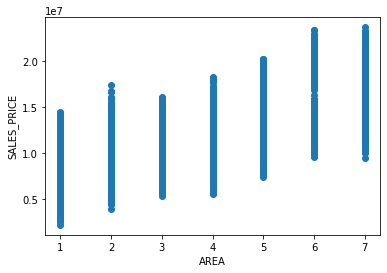

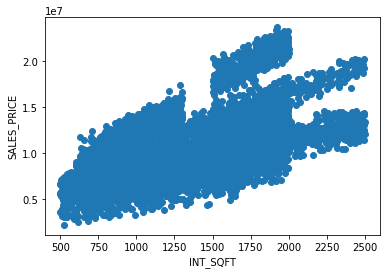

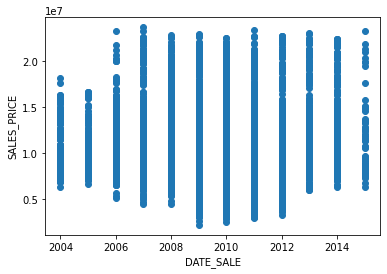

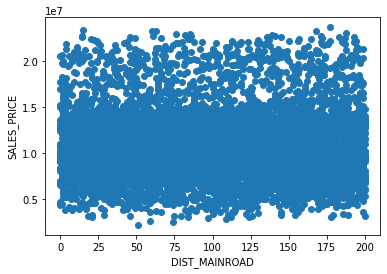

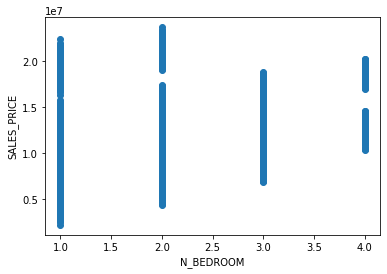

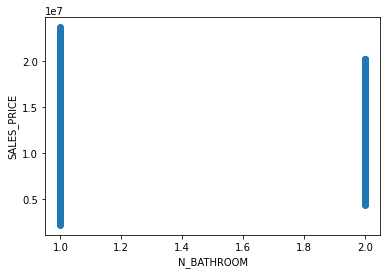

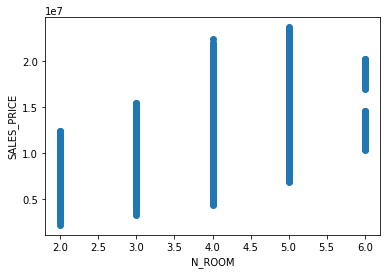

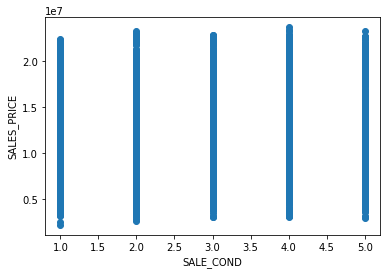

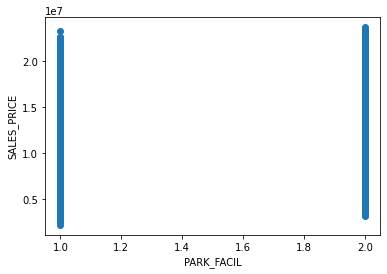

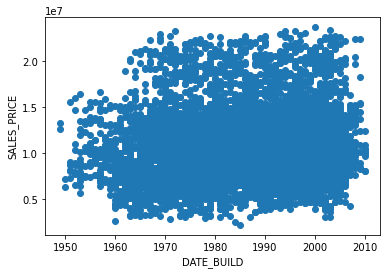

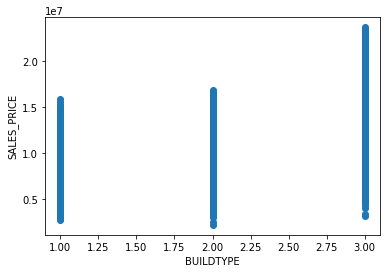

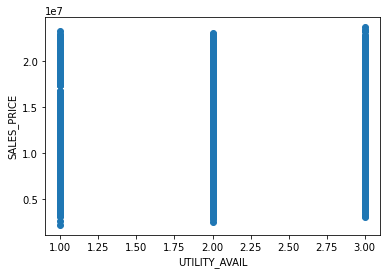

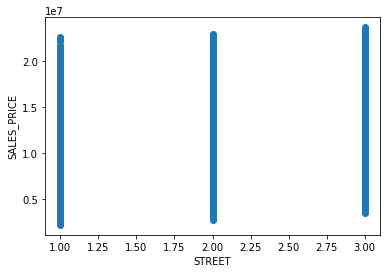

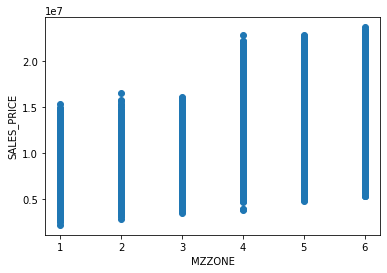

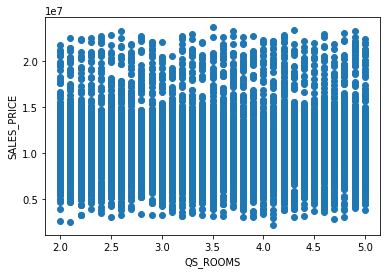

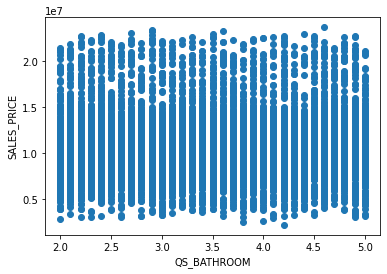

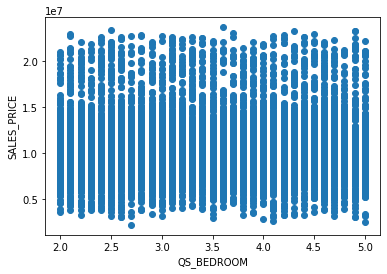

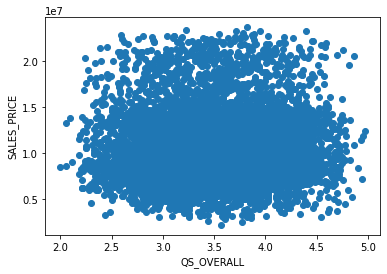

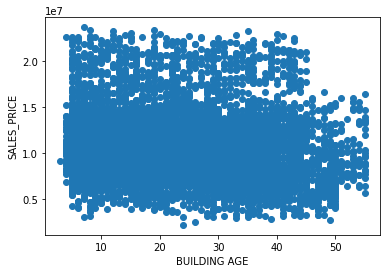

In [69]:
for i in df.columns:
  plt.scatter(df[i],sales_price)
  plt.xlabel(i)
  plt.ylabel('SALES_PRICE')
  plt.show()

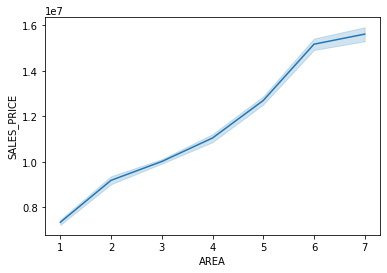

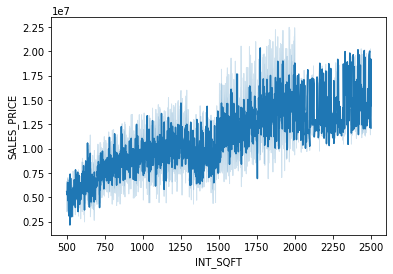

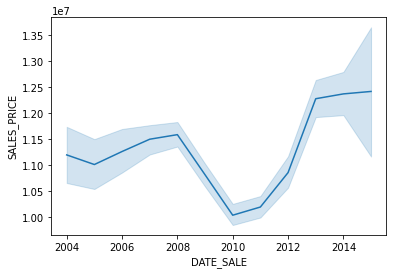

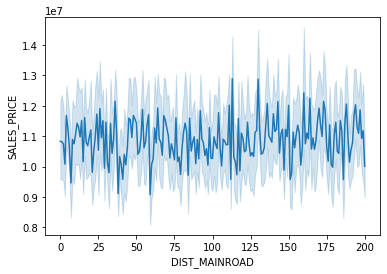

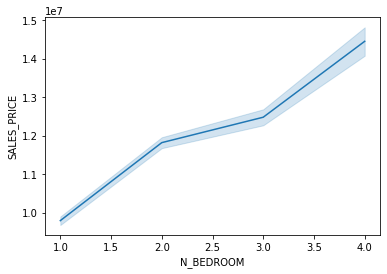

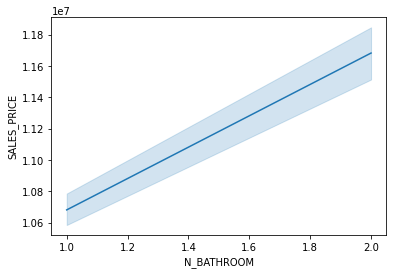

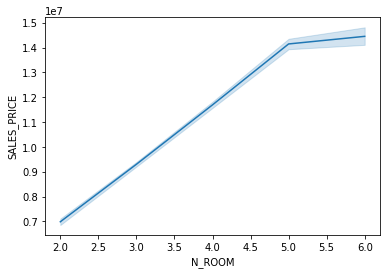

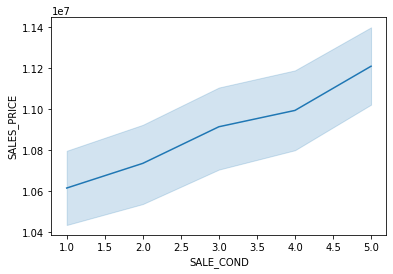

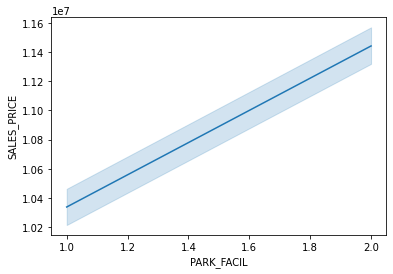

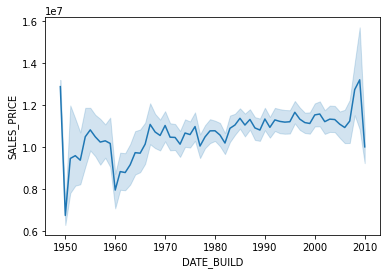

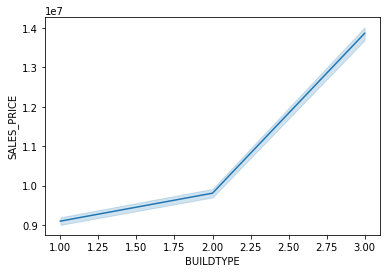

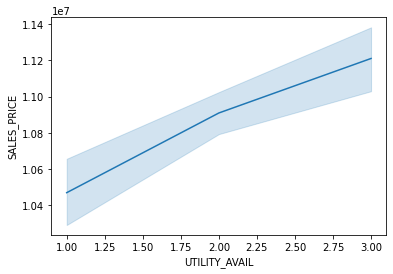

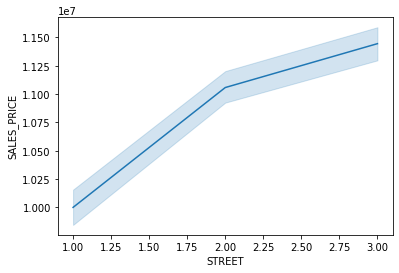

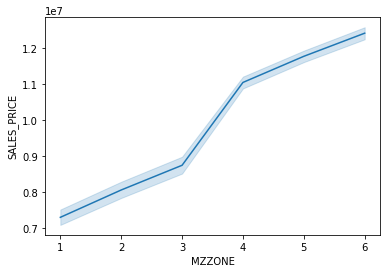

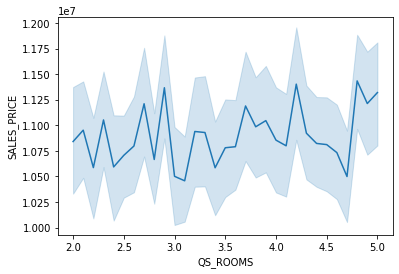

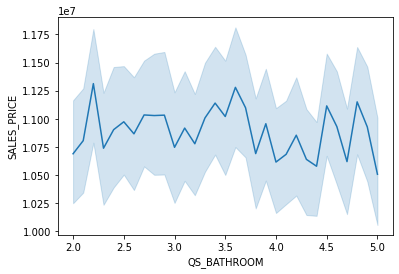

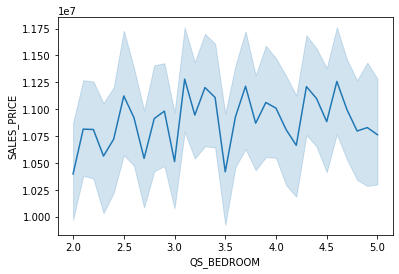

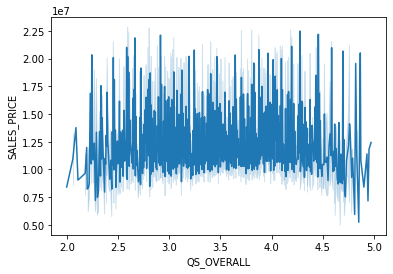

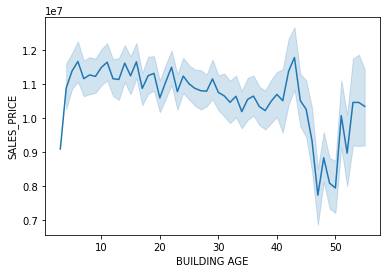

In [70]:
for i in df.columns:
  sns.lineplot(x=df[i],y=sales_price,data=df)
  plt.show()

In [71]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, sales_price, random_state=42, test_size=.33)

In [72]:
from sklearn import linear_model
from sklearn import ensemble

In [73]:
lr = linear_model.LinearRegression()

In [74]:
model = lr.fit(X_train, y_train)

In [75]:
print ("R^2 is: \n", model.score(X_test, y_test))

R^2 is: 
 0.8793948261766543


In [76]:
predictions = model.predict(X_test)

Text(0.5, 1.0, 'Linear Regression Model')

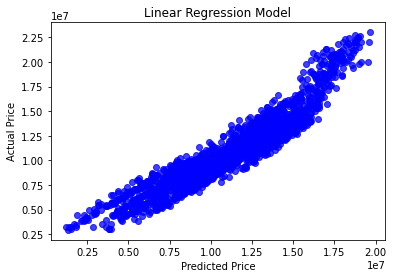

In [77]:
actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Linear Regression Model')

In [78]:
X_test.head(3)

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,BUILDING AGE
4983,3,1222,2012,104,2,1,4,5,2,1999,1,2,2,5,3.9,4.3,4.3,4.18,13
4451,6,1989,2014,156,2,1,5,5,1,2005,2,1,1,4,3.2,4.8,4.4,4.08,9
4514,6,1650,2014,16,1,1,4,5,2,1975,2,3,3,6,3.7,4.3,4.6,4.21,39


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7108 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7108 non-null   int64  
 1   INT_SQFT       7108 non-null   int64  
 2   DATE_SALE      7108 non-null   int64  
 3   DIST_MAINROAD  7108 non-null   int64  
 4   N_BEDROOM      7108 non-null   int64  
 5   N_BATHROOM     7108 non-null   int64  
 6   N_ROOM         7108 non-null   int64  
 7   SALE_COND      7108 non-null   int64  
 8   PARK_FACIL     7108 non-null   int64  
 9   DATE_BUILD     7108 non-null   int64  
 10  BUILDTYPE      7108 non-null   int64  
 11  UTILITY_AVAIL  7108 non-null   int64  
 12  STREET         7108 non-null   int64  
 13  MZZONE         7108 non-null   int64  
 14  QS_ROOMS       7108 non-null   float64
 15  QS_BATHROOM    7108 non-null   float64
 16  QS_BEDROOM     7108 non-null   float64
 17  QS_OVERALL     7108 non-null   float64
 18  BUILDING

# ***Predicting values in a Range***

In [80]:
def indexes_to_columns(s):
  rdf=pd.DataFrame()
  for i in range(len(s.values)):
    for j in range(len(s.index)):
      if i==j:
        rdf[s.index[j]]=s.values[j]
  return rdf
x=X_test.iloc[0]
a=x.copy()
b=x.copy()
a['DATE_SALE']=x['DATE_SALE']-1
b['DATE_SALE']=x['DATE_SALE']+1
x=pd.DataFrame(x)
a=pd.DataFrame(a)
b=pd.DataFrame(b)
x=indexes_to_columns(x)
a=indexes_to_columns(a)
b=indexes_to_columns(b)
print(a)
print(x)
print(b)

   AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0   3.0    1222.0     2011.0          104.0        2.0         1.0     4.0   

   SALE_COND  PARK_FACIL  DATE_BUILD  BUILDTYPE  UTILITY_AVAIL  STREET  \
0        5.0         2.0      1999.0        1.0            2.0     2.0   

   MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  BUILDING AGE  
0     5.0       3.9          4.3         4.3        4.18          13.0  
   AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0   3.0    1222.0     2012.0          104.0        2.0         1.0     4.0   

   SALE_COND  PARK_FACIL  DATE_BUILD  BUILDTYPE  UTILITY_AVAIL  STREET  \
0        5.0         2.0      1999.0        1.0            2.0     2.0   

   MZZONE  QS_ROOMS  QS_BATHROOM  QS_BEDROOM  QS_OVERALL  BUILDING AGE  
0     5.0       3.9          4.3         4.3        4.18          13.0  
   AREA  INT_SQFT  DATE_SALE  DIST_MAINROAD  N_BEDROOM  N_BATHROOM  N_ROOM  \
0   3.0    1222.0 

In [81]:
a=a.append(x,ignore_index = True)
a=a.append(b,ignore_index = True)
a

,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,BUILDING AGE
0,3.0,1222.0,2011.0,104.0,2.0,1.0,4.0,5.0,2.0,1999.0,1.0,2.0,2.0,5.0,3.9,4.3,4.3,4.18,13.0
1,3.0,1222.0,2012.0,104.0,2.0,1.0,4.0,5.0,2.0,1999.0,1.0,2.0,2.0,5.0,3.9,4.3,4.3,4.18,13.0
2,3.0,1222.0,2013.0,104.0,2.0,1.0,4.0,5.0,2.0,1999.0,1.0,2.0,2.0,5.0,3.9,4.3,4.3,4.18,13.0


In [82]:
res=model.predict(a)
print(f"Range predicted : {round(min(res))} - {round(max(res))}" )

Range predicted : 9308032 - 9342160


In [83]:
from sklearn import ensemble
ens = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,learning_rate = 0.1)

In [84]:
ens.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [85]:
ens.score(X_test,y_test)

0.9974611431273259

**Interpretations:**

1.   Area and no of rooms majorly decide the sales price
2.   Building age is negitively correlated with sales price



